In [2]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numba-0.61.2-cp311-cp311-win_amd64.whl.metadata (2.9 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.1-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached msgpack-1.1.1-cp311-cp311-win_amd64.whl (72 kB)
Using cached numba-0.61.2-cp311-cp311-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl (30.3 MB)
Using cached pooch-1.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import librosa
import librosa.display

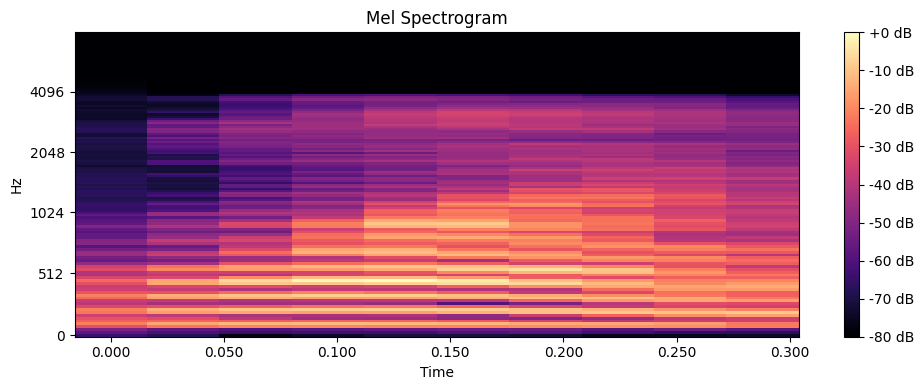

In [2]:
def audio_to_mel_spectrogram(file_path, sr=16000, n_mels=128, max_len=10):
    # 1. Загрузка аудио
    y, _ = librosa.load(file_path, sr=sr)
    # 2. Преобразуем в Mel-спектрограмму (частоты воспринимаются как у человека)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    # 3. Переводим в логарифмическую шкалу
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # (n_mels, time)
    # 4. Транспонируем, чтобы получилось: (время, частоты)
    log_mel_spec = log_mel_spec.T
    # 5. Паддинг до одинаковой длины (если нужно)
    if log_mel_spec.shape[0] < max_len:
        pad_width = max_len - log_mel_spec.shape[0]
        log_mel_spec = np.pad(log_mel_spec, ((0, pad_width), (0, 0)))
    else:
        log_mel_spec = log_mel_spec[:max_len, :]
    return log_mel_spec  # shape: (max_len, n_mels)
# :test_tube: Пример:
spec = audio_to_mel_spectrogram("recordings/1_jackson_23.wav")
# Визуализация
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec.T, sr=16000, hop_length=512, x_axis='time', y_axis='mel')
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [3]:
def audio_to_mel_spectrogram(file_path, sr=16000, n_mels=128, max_len=10):
    # 1. Загрузка аудио
    y, _ = librosa.load(file_path, sr=sr)
    # 2. Преобразуем в Mel-спектрограмму (частоты воспринимаются как у человека)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    # 3. Переводим в логарифмическую шкалу
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # (n_mels, time)
    # 4. Транспонируем, чтобы получилось: (время, частоты)
    log_mel_spec = log_mel_spec.T
    # 5. Паддинг до одинаковой длины (если нужно)
    if log_mel_spec.shape[0] < max_len:
        pad_width = max_len - log_mel_spec.shape[0]
        log_mel_spec = np.pad(log_mel_spec, ((0, pad_width), (0, 0)))
    else:
        log_mel_spec = log_mel_spec[:max_len, :]
    return log_mel_spec  # shape: (max_len, n_mels)
X = []
y = []
for i in os.listdir('recordings/'):
    X.append(audio_to_mel_spectrogram(f'recordings/{i}'))
    y.append(int(i[0]))
X = np.array(X)
y = np.array(y)

In [4]:
X

array([[[-34.683273, -34.334595, -33.760082, ..., -67.25629 ,
         -67.29531 , -67.32199 ],
        [-40.617905, -40.301895, -39.7489  , ..., -73.29461 ,
         -73.3336  , -73.360245],
        [-80.      , -80.      , -80.      , ..., -80.      ,
         -80.      , -80.      ],
        ...,
        [-80.      , -80.      , -80.      , ..., -80.      ,
         -80.      , -80.      ],
        [-52.50506 , -52.259567, -51.797264, ..., -80.      ,
         -80.      , -80.      ],
        [-41.227165, -40.988125, -40.475872, ..., -80.      ,
         -80.      , -80.      ]],

       [[-57.321854, -56.73967 , -55.80873 , ..., -80.      ,
         -80.      , -80.      ],
        [-62.867027, -62.999252, -62.03859 , ..., -80.      ,
         -80.      , -80.      ],
        [-76.33015 , -80.      , -80.      , ..., -80.      ,
         -80.      , -80.      ],
        ...,
        [-76.635635, -80.      , -80.      , ..., -80.      ,
         -80.      , -80.      ],
        [-76

In [5]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [6]:
X.shape

(3000, 10, 128)

In [7]:
y.shape

(3000,)

In [8]:
from keras.utils import to_categorical

In [9]:
y = to_categorical(y, num_classes=10)

In [10]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
X = X.reshape(3000, 10, 128, 1)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(2400, 10, 128, 1)

In [16]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(10, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

C:\Users\ASUS\Desktop\ml_14-45\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1213 - loss: 4.5778 - val_accuracy: 0.1967 - val_loss: 2.0897
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2838 - loss: 1.9967 - val_accuracy: 0.4400 - val_loss: 1.7154
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4464 - loss: 1.6437 - val_accuracy: 0.5500 - val_loss: 1.4472
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6042 - loss: 1.3175 - val_accuracy: 0.6133 - val_loss: 1.2260
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6808 - loss: 1.1117 - val_accuracy: 0.6817 - val_loss: 1.0130
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7282 - loss: 0.8941 - val_accuracy: 0.7300 - val_loss: 0.8833
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7617 - loss: 0.7969 - val_accuracy: 0.7400 - val_loss: 0.8485
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7971 - loss: 0.6561 - val_accuracy: 0.7983 - va

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.d

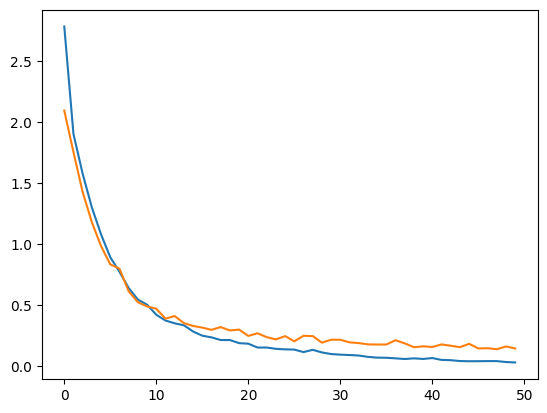

In [23]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

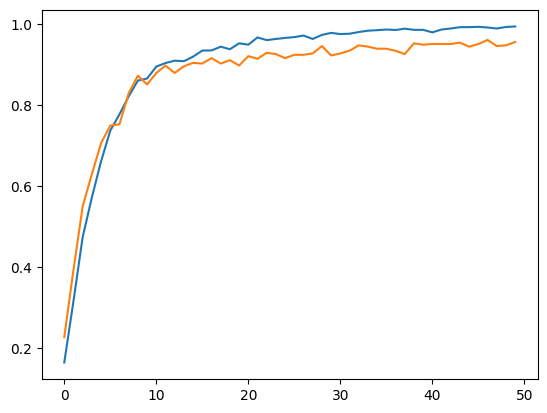

In [25]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

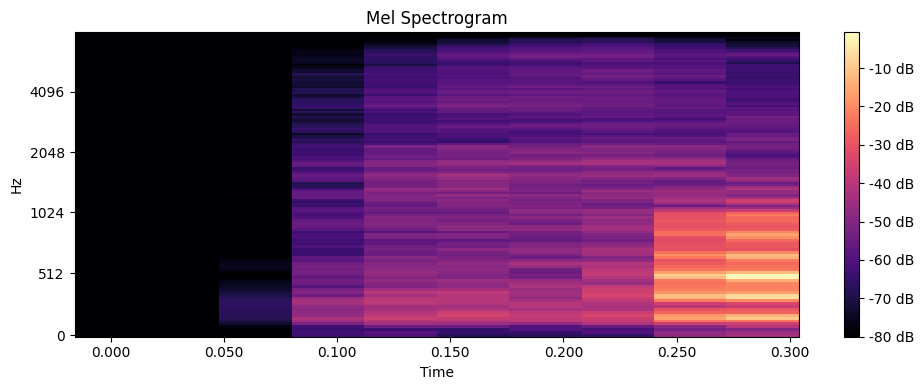

In [26]:

def audio_to_mel_spectrogram(file_path, sr=16000, n_mels=128, max_len=10):
    # 1. Загрузка аудио
    y, _ = librosa.load(file_path, sr=sr)
    # 2. Преобразуем в Mel-спектрограмму (частоты воспринимаются как у человека)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    # 3. Переводим в логарифмическую шкалу
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # (n_mels, time)
    # 4. Транспонируем, чтобы получилось: (время, частоты)
    log_mel_spec = log_mel_spec.T
    # 5. Паддинг до одинаковой длины (если нужно)
    if log_mel_spec.shape[0] < max_len:
        pad_width = max_len - log_mel_spec.shape[0]
        log_mel_spec = np.pad(log_mel_spec, ((0, pad_width), (0, 0)))
    else:
        log_mel_spec = log_mel_spec[:max_len, :]
    return log_mel_spec  # shape: (max_len, n_mels)
# :test_tube: Пример:
spec = audio_to_mel_spectrogram("Untitled video - Made with Clipchamp (2).wav")
# Визуализация
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec.T, sr=16000, hop_length=512, x_axis='time', y_axis='mel')
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [27]:
spec

array([[-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-66.28107 , -60.15283 , -61.66503 , ..., -70.79959 , -80.      ,
        -80.      ],
       [-47.488922, -47.901165, -53.17974 , ..., -74.85751 , -78.49974 ,
        -80.      ],
       [-43.622597, -45.14041 , -50.67614 , ..., -75.28853 , -79.906   ,
        -80.      ]], dtype=float32)

In [28]:
spec.shape

(10, 128)

In [29]:
spec = spec.reshape(1, 10, 128, 1)

In [31]:
np.argmax(model.predict(spec))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


np.int64(4)

In [ ]:
def predict(data):
    data = audio_to_mel_spectrogram(data)
    return np.argmax(model.predict(data))
print(predict('4.wav'))